In [1]:
import sklearn
print("sklearn version:", sklearn.__version__)

sklearn version: 1.7.2


In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Model Evaluation Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve,
    average_precision_score
)

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Utilities
import warnings
import joblib
import os
from datetime import datetime

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")
print(f"📅 Current Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🎲 Random State: {RANDOM_STATE}")

✅ All libraries imported successfully!
📅 Current Date: 2025-11-21 18:58:00
🎲 Random State: 42


In [3]:
# Load the processed data from notebook 01
data_path = '../Data/processed/provider_features_final.csv'

print(f"📂 Loading data from: {data_path}")
print("="*70)

try:
    df = pd.read_csv(data_path)
    print("✅ Data loaded successfully!\n")
    
    # Display basic information
    print(f"📊 Dataset Shape: {df.shape}")
    print(f"   - Providers: {df.shape[0]:,}")
    print(f"   - Columns: {df.shape[1]}")
    
    print(f"\n📋 Columns in dataset:")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col}")
    
    print(f"\n👀 First 5 rows:")
    display(df.head())
    
except FileNotFoundError:
    print("❌ ERROR: File not found!")
    print(f"\nSearched at: {data_path}")
    print("\n🔍 Please check:")
    print("   1. Did notebook 01 complete successfully?")
    print("   2. Is the file in the correct location?")
    print("   3. Is the filename spelled correctly?")
    raise

📂 Loading data from: ../Data/processed/provider_features_final.csv
✅ Data loaded successfully!

📊 Dataset Shape: (5410, 26)
   - Providers: 5,410
   - Columns: 26

📋 Columns in dataset:
    1. Provider
    2. PotentialFraud
    3. InscClaimAmtReimbursed_sum
    4. InscClaimAmtReimbursed_mean
    5. InscClaimAmtReimbursed_std
    6. InscClaimAmtReimbursed_count
    7. DeductibleAmtPaid_sum
    8. DeductibleAmtPaid_mean
    9. Inpatient
   10. Outpatient
   11. UniqueAttendingPhysicians
   12. UniqueOperatingPhysicians
   13. UniqueOtherPhysicians
   14. FraudBinary
   15. Inpatient_Ratio
   16. Total_Physicians
   17. Amount_Per_Physician
   18. Inpatient_Outpatient_Ratio
   19. Deductible_Ratio
   20. Pct_Male
   21. Unique_Races
   22. Unique_States
   23. Pct_RenalDisease
   24. Pct_Alzheimer
   25. Pct_Heartfailure
   26. Pct_Diabetes

👀 First 5 rows:


,Provider,PotentialFraud,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,InscClaimAmtReimbursed_count,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,Inpatient,Outpatient,...,Amount_Per_Physician,Inpatient_Outpatient_Ratio,Deductible_Ratio,Pct_Male,Unique_Races,Unique_States,Pct_RenalDisease,Pct_Alzheimer,Pct_Heartfailure,Pct_Diabetes
0,PRV51001,No,104640,4185.60,10796.09,25,5340.0,213.60,5,20,...,5507.368421,0.238095,0.051032,0.3750,2,1,0.3333,1.4167,1.2500,1.1667
1,PRV51003,Yes,605670,4588.41,7309.79,132,66286.0,502.17,62,70,...,11875.882353,0.873239,0.109442,0.4188,3,3,0.1880,1.6239,1.4017,1.2564
2,PRV51004,No,52170,350.13,689.96,149,310.0,2.08,0,149,...,915.263158,0.000000,0.005942,0.3261,3,9,0.1449,1.5652,1.4058,1.3043
3,PRV51005,Yes,280910,241.12,491.56,1165,3700.0,3.18,0,1165,...,23409.166667,0.000000,0.013171,0.4202,3,4,0.1596,1.6667,1.4687,1.3657
4,PRV51007,No,33710,468.19,1433.77,72,3264.0,45.33,3,69,...,2247.333333,0.042857,0.096823,0.4655,2,2,0.1552,1.6379,1.4828,1.3793


In [4]:
print("🔍 DATA QUALITY ASSESSMENT")
print("="*70)

# Check data types
print("\n1️⃣ Data Types:")
print(df.dtypes)

# Check for missing values
print("\n2️⃣ Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✅ No missing values found!")
else:
    print("   ⚠️ Missing values detected:")
    print(missing[missing > 0])

# Check for duplicate providers
print("\n3️⃣ Duplicate Check:")
duplicates = df.duplicated(subset=['Provider']).sum()
if duplicates == 0:
    print("   ✅ No duplicate providers found!")
else:
    print(f"   ⚠️ Found {duplicates} duplicate providers")

# Check target distribution
print("\n4️⃣ Target Variable Distribution:")
print(df['PotentialFraud'].value_counts())
print(f"\n   Fraud Percentage: {(df['PotentialFraud'] == 'Yes').mean() * 100:.2f}%")

# Basic statistics
print("\n5️⃣ Numerical Features Summary:")
display(df.describe())

🔍 DATA QUALITY ASSESSMENT

1️⃣ Data Types:
Provider                         object
PotentialFraud                   object
InscClaimAmtReimbursed_sum        int64
InscClaimAmtReimbursed_mean     float64
InscClaimAmtReimbursed_std      float64
InscClaimAmtReimbursed_count      int64
DeductibleAmtPaid_sum           float64
DeductibleAmtPaid_mean          float64
Inpatient                         int64
Outpatient                        int64
UniqueAttendingPhysicians         int64
UniqueOperatingPhysicians         int64
UniqueOtherPhysicians             int64
FraudBinary                       int64
Inpatient_Ratio                 float64
Total_Physicians                  int64
Amount_Per_Physician            float64
Inpatient_Outpatient_Ratio      float64
Deductible_Ratio                float64
Pct_Male                        float64
Unique_Races                      int64
Unique_States                     int64
Pct_RenalDisease                float64
Pct_Alzheimer                   float

,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,InscClaimAmtReimbursed_count,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,Inpatient,Outpatient,UniqueAttendingPhysicians,UniqueOperatingPhysicians,...,Amount_Per_Physician,Inpatient_Outpatient_Ratio,Deductible_Ratio,Pct_Male,Unique_Races,Unique_States,Pct_RenalDisease,Pct_Alzheimer,Pct_Heartfailure,Pct_Diabetes
count,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,...,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,1.028730e+05,1740.679346,2424.047725,103.181331,8078.560444,155.643139,7.481331,95.700000,16.248614,6.784843,...,6615.890774,0.876281,0.457232,0.421078,2.517560,2.573198,0.187803,1.606169,1.419835,1.307933
std,2.687367e+05,3484.473097,3649.238906,272.456989,24924.637743,306.461122,23.704217,266.520526,28.861828,12.379928,...,18374.569888,4.177321,20.553794,0.176109,1.085104,3.053825,0.141779,0.177449,0.179912,0.168146
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.460000e+03,232.397500,392.745000,10.000000,10.000000,0.312500,0.000000,7.000000,2.000000,1.000000,...,526.176471,0.000000,0.001080,0.352900,2.000000,1.000000,0.125000,1.534950,1.341875,1.236800
50%,1.980500e+04,356.085000,674.255000,31.000000,310.000000,4.290000,0.000000,27.000000,6.000000,3.000000,...,1727.815431,0.000000,0.015834,0.421400,2.000000,1.000000,0.176500,1.611100,1.423100,1.307700
75%,8.556500e+04,1490.152500,3400.480000,87.000000,5340.000000,137.487500,5.000000,77.000000,19.000000,8.000000,...,5057.201087,0.142857,0.085013,0.500000,3.000000,3.000000,0.229200,1.676500,1.500000,1.375000
max,5.996050e+06,57000.000000,50204.580000,8240.000000,539426.000000,1068.000000,516.000000,8240.000000,643.000000,337.000000,...,460466.666667,119.000000,1068.000000,1.000000,4.000000,38.000000,1.000000,2.000000,2.000000,2.000000


In [5]:
print("📌 STEP 4.1: Separating Features and Target")
print("="*70)

# Store Provider IDs for later reference
provider_ids = df['Provider'].copy()
print(f"✅ Stored {len(provider_ids):,} Provider IDs for reference")

# Define target column
target_column = 'PotentialFraud'
print(f"\n🎯 Target Column: '{target_column}'")

# Identify columns to drop
columns_to_drop = ['Provider', 'PotentialFraud']

# Check if FraudBinary exists and drop it
if 'FraudBinary' in df.columns:
    columns_to_drop.append('FraudBinary')
    print("   ℹ️  FraudBinary column found - will be dropped (same as target)")

# Separate features (X) and target (y)
X = df.drop(columns=columns_to_drop)
y = df[target_column].copy()

print(f"\n✅ Data Separated:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")

print(f"\n📋 Feature List ({len(X.columns)} features):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

📌 STEP 4.1: Separating Features and Target
✅ Stored 5,410 Provider IDs for reference

🎯 Target Column: 'PotentialFraud'
   ℹ️  FraudBinary column found - will be dropped (same as target)

✅ Data Separated:
   Features (X): (5410, 23)
   Target (y): (5410,)

📋 Feature List (23 features):
    1. InscClaimAmtReimbursed_sum
    2. InscClaimAmtReimbursed_mean
    3. InscClaimAmtReimbursed_std
    4. InscClaimAmtReimbursed_count
    5. DeductibleAmtPaid_sum
    6. DeductibleAmtPaid_mean
    7. Inpatient
    8. Outpatient
    9. UniqueAttendingPhysicians
   10. UniqueOperatingPhysicians
   11. UniqueOtherPhysicians
   12. Inpatient_Ratio
   13. Total_Physicians
   14. Amount_Per_Physician
   15. Inpatient_Outpatient_Ratio
   16. Deductible_Ratio
   17. Pct_Male
   18. Unique_Races
   19. Unique_States
   20. Pct_RenalDisease
   21. Pct_Alzheimer
   22. Pct_Heartfailure
   23. Pct_Diabetes


In [6]:
print("📌 STEP 4.2: Converting Target to Binary")
print("="*70)

print(f"\nBefore conversion:")
print(f"   Data type: {y.dtype}")
print(f"   Unique values: {y.unique()}")
print(f"   Value counts:\n{y.value_counts()}")

# Convert to binary
# Yes → 1 (Fraud)
# No → 0 (Non-fraud)
y = y.map({'Yes': 1, 'No': 0})

print(f"\n✅ After conversion:")
print(f"   Data type: {y.dtype}")
print(f"   Unique values: {y.unique()}")
print(f"   Value counts:\n{y.value_counts()}")

# Calculate fraud percentage
fraud_pct = (y.sum() / len(y)) * 100
print(f"\n📊 Class Distribution:")
print(f"   Non-Fraud (0): {(y == 0).sum():,} ({100-fraud_pct:.2f}%)")
print(f"   Fraud (1):     {(y == 1).sum():,} ({fraud_pct:.2f}%)")
print(f"\n⚠️  Class Imbalance Ratio: {(y == 0).sum() / (y == 1).sum():.1f}:1")

📌 STEP 4.2: Converting Target to Binary

Before conversion:
   Data type: object
   Unique values: ['No' 'Yes']
   Value counts:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

✅ After conversion:
   Data type: int64
   Unique values: [0 1]
   Value counts:
PotentialFraud
0    4904
1     506
Name: count, dtype: int64

📊 Class Distribution:
   Non-Fraud (0): 4,904 (90.65%)
   Fraud (1):     506 (9.35%)

⚠️  Class Imbalance Ratio: 9.7:1


In [7]:
print("📌 STEP 4.3: Train/Validation/Test Split")
print("="*70)

print("\n📊 Split Strategy:")
print("   70% → Training Set (learn patterns)")
print("   15% → Validation Set (tune & compare models)")
print("   15% → Test Set (final evaluation)")

# First split: 70% train, 30% temp (for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,              # 30% for temp
    random_state=RANDOM_STATE,   # Reproducibility
    stratify=y                   # Maintain class distribution
)

print("\n✅ First split completed (70-30)")

# Second split: Split temp into 50% validation, 50% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,              # 50% of 30% = 15%
    random_state=RANDOM_STATE,
    stratify=y_temp
)

print("✅ Second split completed (15-15)\n")

# Display split sizes
print("="*70)
print("📊 FINAL SPLIT SUMMARY")
print("="*70)

total_samples = len(X)

print(f"\n{'Set':<15} {'Samples':<12} {'%':<8} {'Fraud':<10} {'Fraud %':<10}")
print("-" * 70)

sets = [
    ('Training', len(X_train), y_train),
    ('Validation', len(X_val), y_val),
    ('Test', len(X_test), y_test)
]

for set_name, size, labels in sets:
    fraud_count = labels.sum()
    fraud_pct = (fraud_count / len(labels)) * 100
    size_pct = (size / total_samples) * 100
    print(f"{set_name:<15} {size:>6,} {size_pct:>6.1f}% {fraud_count:>6,} {fraud_pct:>8.2f}%")

print("-" * 70)
print(f"{'TOTAL':<15} {total_samples:>6,} {'100.0%':>7} {y.sum():>6,} {(y.sum()/total_samples)*100:>8.2f}%")

print("\n✅ Stratification successful - fraud ratio maintained across all sets!")

📌 STEP 4.3: Train/Validation/Test Split

📊 Split Strategy:
   70% → Training Set (learn patterns)
   15% → Validation Set (tune & compare models)
   15% → Test Set (final evaluation)

✅ First split completed (70-30)
✅ Second split completed (15-15)

📊 FINAL SPLIT SUMMARY

Set             Samples      %        Fraud      Fraud %   
----------------------------------------------------------------------
Training         3,787   70.0%    354     9.35%
Validation         811   15.0%     76     9.37%
Test               812   15.0%     76     9.36%
----------------------------------------------------------------------
TOTAL            5,410  100.0%    506     9.35%

✅ Stratification successful - fraud ratio maintained across all sets!


In [8]:
print("📌 STEP 4.4: Feature Scaling with RobustScaler")
print("="*70)

print("\n🔧 Scaler Choice: RobustScaler")
print("   Formula: (x - median) / IQR")
print("   Reason: Robust to outliers in healthcare data\n")

# Show sample data before scaling
print("📊 Sample Features BEFORE Scaling:")
display(X_train.head())

# Initialize scaler
scaler = RobustScaler()

# Fit on training data ONLY
print("\n🔄 Fitting scaler on training data...")
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
print("🔄 Transforming validation and test sets...")
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n✅ Scaling completed!\n")

print("📊 Sample Features AFTER Scaling:")
display(X_train_scaled.head())

# Show scaling statistics
print("\n📈 Scaling Statistics (from training data):")
print(f"\n{'Feature':<40} {'Median':<12} {'IQR':<12}")
print("-" * 70)
for i, col in enumerate(X_train.columns[:5]):  # Show first 5
    median = np.median(X_train[col])
    iqr = np.percentile(X_train[col], 75) - np.percentile(X_train[col], 25)
    print(f"{col:<40} {median:>11.2f} {iqr:>11.2f}")
print("   ... (showing first 5 features)")

print("\n💡 Key Points:")
print("   ✅ All features now have similar scales")
print("   ✅ Outliers have less impact due to robust statistics")
print("   ✅ Scaler fitted only on training data (no data leakage)")
print("   ✅ Same transformation applied to validation and test sets")

📌 STEP 4.4: Feature Scaling with RobustScaler

🔧 Scaler Choice: RobustScaler
   Formula: (x - median) / IQR
   Reason: Robust to outliers in healthcare data

📊 Sample Features BEFORE Scaling:


,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,InscClaimAmtReimbursed_count,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,Inpatient,Outpatient,UniqueAttendingPhysicians,UniqueOperatingPhysicians,...,Amount_Per_Physician,Inpatient_Outpatient_Ratio,Deductible_Ratio,Pct_Male,Unique_Races,Unique_States,Pct_RenalDisease,Pct_Alzheimer,Pct_Heartfailure,Pct_Diabetes
3482,24770,215.39,459.95,115,310.0,2.70,0,115,56,16,...,344.027778,0.000000,0.012515,0.3663,3,2,0.1386,1.6139,1.4257,1.2673
835,27720,533.08,1286.10,52,1068.0,20.54,1,51,16,7,...,1205.217391,0.019231,0.038527,0.3600,4,2,0.0800,1.6200,1.4000,1.3600
1318,1328240,3046.42,5544.34,436,153514.0,354.54,146,290,10,8,...,73791.111111,0.501718,0.115577,0.4068,4,3,0.2319,1.6084,1.3764,1.3118
5348,41250,310.15,600.20,133,340.0,2.56,0,133,1,1,...,20625.000000,0.000000,0.008242,0.4103,4,1,0.1709,1.6410,1.4530,1.2906
3351,20250,293.48,600.77,69,290.0,4.20,0,69,1,1,...,10125.000000,0.000000,0.014320,0.4364,3,4,0.2364,1.4727,1.4000,1.1636



🔄 Fitting scaler on training data...
🔄 Transforming validation and test sets...

✅ Scaling completed!

📊 Sample Features AFTER Scaling:


,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,InscClaimAmtReimbursed_count,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,Inpatient,Outpatient,UniqueAttendingPhysicians,UniqueOperatingPhysicians,...,Amount_Per_Physician,Inpatient_Outpatient_Ratio,Deductible_Ratio,Pct_Male,Unique_Races,Unique_States,Pct_RenalDisease,Pct_Alzheimer,Pct_Heartfailure,Pct_Diabetes
3482,0.061007,-0.111030,-0.070767,1.112583,0.000000,-0.011259,0.0,1.308824,3.1250,1.857143,...,-0.308068,0.000000,-0.038206,-0.391185,1.0,0.5,-0.367675,0.019126,0.027594,-0.299038
835,0.097146,0.133837,0.202929,0.278146,0.140370,0.112725,0.2,0.367647,0.6250,0.571429,...,-0.118018,0.128764,0.269987,-0.434573,2.0,0.5,-0.921550,0.060792,-0.126575,0.387121
1318,16.029033,2.071050,1.613648,5.364238,28.371111,2.433943,29.2,3.882353,0.2500,0.714286,...,15.900490,3.359358,1.182882,-0.112259,2.0,1.0,0.514178,-0.018443,-0.268146,0.030348
5348,0.262894,-0.037991,-0.024304,1.350993,0.005556,-0.012232,0.0,1.573529,-0.3125,-0.285714,...,4.167608,0.000000,-0.088826,-0.088154,2.0,0.0,-0.062382,0.204235,0.191362,-0.126573
3351,0.005635,-0.050840,-0.024115,0.503311,-0.003704,-0.000834,0.0,0.632353,-0.3125,-0.285714,...,1.850431,0.000000,-0.016812,0.091598,1.0,1.5,0.556711,-0.945355,-0.126575,-1.066617



📈 Scaling Statistics (from training data):

Feature                                  Median       IQR         
----------------------------------------------------------------------
InscClaimAmtReimbursed_sum                  19790.00    81630.00
InscClaimAmtReimbursed_mean                   359.44     1297.40
InscClaimAmtReimbursed_std                    673.56     3018.49
InscClaimAmtReimbursed_count                   31.00       75.50
DeductibleAmtPaid_sum                         310.00     5400.00
   ... (showing first 5 features)

💡 Key Points:
   ✅ All features now have similar scales
   ✅ Outliers have less impact due to robust statistics
   ✅ Scaler fitted only on training data (no data leakage)
   ✅ Same transformation applied to validation and test sets


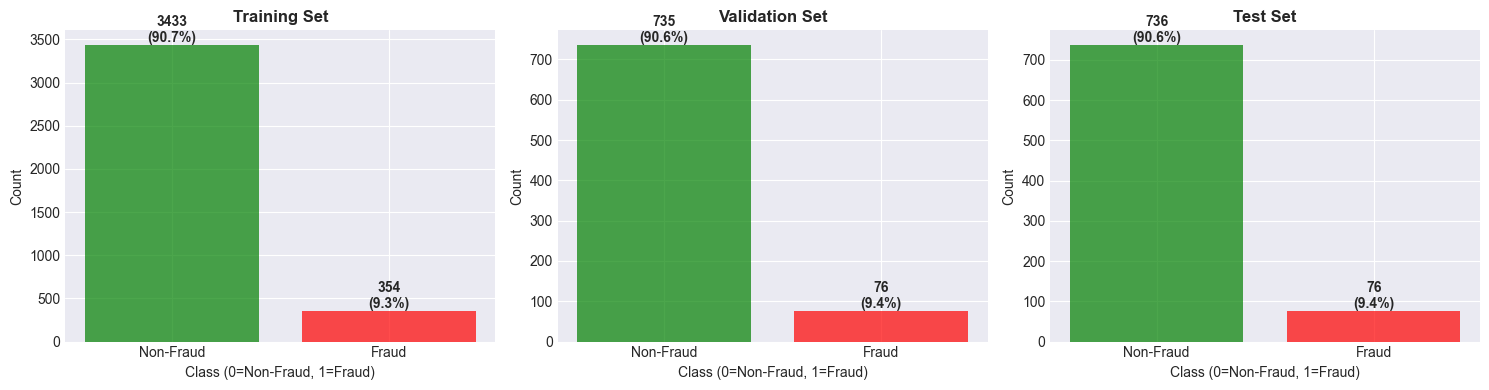


⚠️ SEVERE CLASS IMBALANCE DETECTED
   This will be addressed in the next section using SMOTE


In [9]:
# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sets = [
    ('Training Set', y_train),
    ('Validation Set', y_val),
    ('Test Set', y_test)
]

for ax, (title, labels) in zip(axes, sets):
    counts = labels.value_counts()
    ax.bar([0, 1], counts, color=['green', 'red'], alpha=0.7)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Class (0=Non-Fraud, 1=Fraud)')
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])
    
    # Add percentage labels
    for i, count in enumerate(counts):
        pct = (count / len(labels)) * 100
        ax.text(i, count, f'{count}\n({pct:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⚠️ SEVERE CLASS IMBALANCE DETECTED")
print("   This will be addressed in the next section using SMOTE")

In [10]:
print("📌 STEP 5: Handling Class Imbalance with SMOTE")
print("="*70)

print("\n📊 BEFORE SMOTE - Training Set:")
print(f"   Total samples: {len(y_train):,}")
print(f"   Non-Fraud (0): {(y_train == 0).sum():,}")
print(f"   Fraud (1):     {(y_train == 1).sum():,}")
print(f"   Imbalance ratio: {(y_train == 0).sum() / (y_train == 1).sum():.1f}:1")
fraud_pct_before = (y_train.sum() / len(y_train)) * 100
print(f"   Fraud percentage: {fraud_pct_before:.2f}%")

# Initialize SMOTE
print("\n🔧 SMOTE Configuration:")
print("   Strategy: Oversample minority class to match majority")
print("   K-neighbors: 5 (default)")
print("   Random state: 42 (reproducibility)")

smote = SMOTE(
    sampling_strategy='auto',  # Balance to 50-50
    k_neighbors=5,             # Use 5 nearest neighbors
    random_state=RANDOM_STATE
)

# Apply SMOTE to training data
print("\n🔄 Applying SMOTE to training data...")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\n✅ SMOTE Applied Successfully!\n")

print("📊 AFTER SMOTE - Training Set:")
print(f"   Total samples: {len(y_train_resampled):,}")
print(f"   Non-Fraud (0): {(y_train_resampled == 0).sum():,}")
print(f"   Fraud (1):     {(y_train_resampled == 1).sum():,}")
print(f"   Imbalance ratio: {(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum():.1f}:1")
fraud_pct_after = (y_train_resampled.sum() / len(y_train_resampled)) * 100
print(f"   Fraud percentage: {fraud_pct_after:.2f}%")

# Calculate how many synthetic samples were created
original_fraud = (y_train == 1).sum()
total_fraud_after = (y_train_resampled == 1).sum()
synthetic_fraud = total_fraud_after - original_fraud

print(f"\n📈 Synthetic Samples Created:")
print(f"   Original fraud cases: {original_fraud:,}")
print(f"   Synthetic fraud cases: {synthetic_fraud:,}")
print(f"   Total fraud cases: {total_fraud_after:,}")

print("\n💡 Key Points:")
print("   ✅ Classes are now balanced (50-50)")
print("   ✅ Model will not be biased toward non-fraud")
print("   ✅ Validation and test sets remain imbalanced (real-world simulation)")
print("   ✅ Synthetic samples are realistic (created from nearest neighbors)")

📌 STEP 5: Handling Class Imbalance with SMOTE

📊 BEFORE SMOTE - Training Set:
   Total samples: 3,787
   Non-Fraud (0): 3,433
   Fraud (1):     354
   Imbalance ratio: 9.7:1
   Fraud percentage: 9.35%

🔧 SMOTE Configuration:
   Strategy: Oversample minority class to match majority
   K-neighbors: 5 (default)
   Random state: 42 (reproducibility)

🔄 Applying SMOTE to training data...

✅ SMOTE Applied Successfully!

📊 AFTER SMOTE - Training Set:
   Total samples: 6,866
   Non-Fraud (0): 3,433
   Fraud (1):     3,433
   Imbalance ratio: 1.0:1
   Fraud percentage: 50.00%

📈 Synthetic Samples Created:
   Original fraud cases: 354
   Synthetic fraud cases: 3,079
   Total fraud cases: 3,433

💡 Key Points:
   ✅ Classes are now balanced (50-50)
   ✅ Model will not be biased toward non-fraud
   ✅ Validation and test sets remain imbalanced (real-world simulation)
   ✅ Synthetic samples are realistic (created from nearest neighbors)


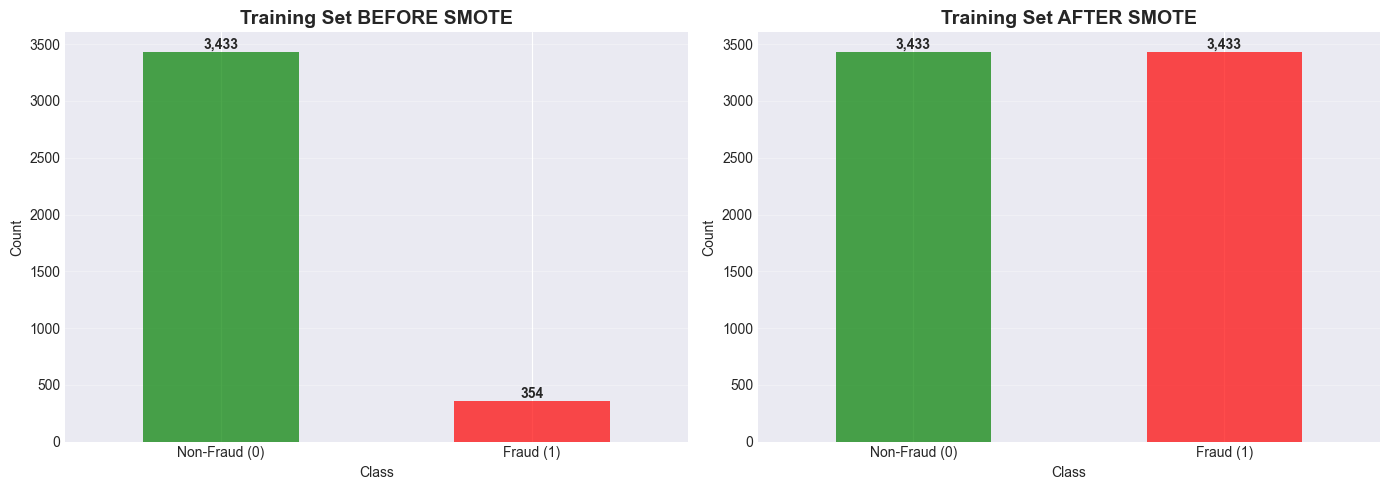


✅ Training set is now balanced and ready for model training!


In [11]:
# Visualize before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
y_train.value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Training Set BEFORE SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels
for i, count in enumerate(y_train.value_counts()):
    axes[0].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# After SMOTE
pd.Series(y_train_resampled).value_counts().plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.7)
axes[1].set_title('Training Set AFTER SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Add count labels
for i, count in enumerate(pd.Series(y_train_resampled).value_counts()):
    axes[1].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Training set is now balanced and ready for model training!")

In [12]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Train and evaluate a model
    
    Parameters:
    -----------
    model : estimator
        Machine learning model
    X_train, y_train : array-like
        Training data
    X_val, y_val : array-like
        Validation data
    model_name : str
        Name of the model for display
    
    Returns:
    --------
    dict : Dictionary containing evaluation metrics
    model : trained model
    """
    
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Get prediction probabilities (for ROC-AUC)
    if hasattr(model, 'predict_proba'):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_val_proba = model.predict_proba(X_val)[:, 1]
    else:  # For SVM without probability=True
        y_train_proba = model.decision_function(X_train)
        y_val_proba = model.decision_function(X_val)
    
    # Calculate metrics
    metrics = {
        'model_name': model_name,
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'val_accuracy': accuracy_score(y_val, y_val_pred),
        'train_precision': precision_score(y_train, y_train_pred, zero_division=0),
        'val_precision': precision_score(y_val, y_val_pred, zero_division=0),
        'train_recall': recall_score(y_train, y_train_pred, zero_division=0),
        'val_recall': recall_score(y_val, y_val_pred, zero_division=0),
        'train_f1': f1_score(y_train, y_train_pred, zero_division=0),
        'val_f1': f1_score(y_val, y_val_pred, zero_division=0),
        'train_roc_auc': roc_auc_score(y_train, y_train_proba),
        'val_roc_auc': roc_auc_score(y_val, y_val_proba),
        'val_pr_auc': average_precision_score(y_val, y_val_proba)
    }
    
    # Print results
    print(f"\n{model_name} Performance:")
    print(f"\nTraining Set:")
    print(f"  Accuracy:  {metrics['train_accuracy']:.4f}")
    print(f"  Precision: {metrics['train_precision']:.4f}")
    print(f"  Recall:    {metrics['train_recall']:.4f}")
    print(f"  F1-Score:  {metrics['train_f1']:.4f}")
    print(f"  ROC-AUC:   {metrics['train_roc_auc']:.4f}")
    
    print(f"\nValidation Set:")
    print(f"  Accuracy:  {metrics['val_accuracy']:.4f}")
    print(f"  Precision: {metrics['val_precision']:.4f}")
    print(f"  Recall:    {metrics['val_recall']:.4f}")
    print(f"  F1-Score:  {metrics['val_f1']:.4f}")
    print(f"  ROC-AUC:   {metrics['val_roc_auc']:.4f}")
    print(f"  PR-AUC:    {metrics['val_pr_auc']:.4f}")
    
    # Confusion Matrix
    print(f"\nValidation Confusion Matrix:")
    cm = confusion_matrix(y_val, y_val_pred)
    print(cm)
    print(f"  TN={cm[0,0]}, FP={cm[0,1]}")
    print(f"  FN={cm[1,0]}, TP={cm[1,1]}")
    
    return metrics, model

print("✅ Evaluation function defined!")

✅ Evaluation function defined!


In [13]:
print("\n" + "="*70)
print("MODEL 1: LOGISTIC REGRESSION (BASELINE)")
print("="*70)

print("\n🎯 Why Logistic Regression?")
print("   ✅ Simple and interpretable (good baseline)")
print("   ✅ Fast to train")
print("   ✅ Works well for binary classification")
print("   ✅ Coefficients show feature importance")
print("   ✅ Industry standard for comparison")

print("\n🔧 Hyperparameters:")
print("   - max_iter: 1000 (ensure convergence)")
print("   - random_state: 42 (reproducibility)")
print("   - class_weight: 'balanced' (handle any remaining imbalance)")

# Initialize Logistic Regression
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

# Train and evaluate
lr_metrics, lr_trained = evaluate_model(
    lr_model, 
    X_train_resampled, y_train_resampled,
    X_val_scaled, y_val,
    "Logistic Regression"
)

print("\n" + "="*70)


MODEL 1: LOGISTIC REGRESSION (BASELINE)

🎯 Why Logistic Regression?
   ✅ Simple and interpretable (good baseline)
   ✅ Fast to train
   ✅ Works well for binary classification
   ✅ Coefficients show feature importance
   ✅ Industry standard for comparison

🔧 Hyperparameters:
   - max_iter: 1000 (ensure convergence)
   - random_state: 42 (reproducibility)
   - class_weight: 'balanced' (handle any remaining imbalance)

Training Logistic Regression...

Logistic Regression Performance:

Training Set:
  Accuracy:  0.8621
  Precision: 0.8724
  Recall:    0.8482
  F1-Score:  0.8601
  ROC-AUC:   0.9368

Validation Set:
  Accuracy:  0.8742
  Precision: 0.4156
  Recall:    0.8421
  F1-Score:  0.5565
  ROC-AUC:   0.9406
  PR-AUC:    0.6951

Validation Confusion Matrix:
[[645  90]
 [ 12  64]]
  TN=645, FP=90
  FN=12, TP=64



In [14]:
print("\n" + "="*70)
print("MODEL 2: RANDOM FOREST")
print("="*70)

print("\n🎯 Why Random Forest?")
print("   ✅ Handles non-linear relationships")
print("   ✅ Resistant to overfitting (ensemble of trees)")
print("   ✅ Provides feature importance")
print("   ✅ Works well with mixed feature types")
print("   ✅ No need for feature scaling (but we did it anyway)")
print("   ✅ Robust to outliers")

print("\n🔧 Hyperparameters:")
print("   - n_estimators: 100 (number of trees)")
print("   - max_depth: 20 (prevent overfitting)")
print("   - min_samples_split: 10 (minimum samples to split)")
print("   - min_samples_leaf: 5 (minimum samples per leaf)")
print("   - class_weight: 'balanced' (handle imbalance)")
print("   - n_jobs: -1 (use all CPU cores)")

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced'
)

# Train and evaluate
rf_metrics, rf_trained = evaluate_model(
    rf_model,
    X_train_resampled, y_train_resampled,
    X_val_scaled, y_val,
    "Random Forest"
)

print("\n" + "="*70)


MODEL 2: RANDOM FOREST

🎯 Why Random Forest?
   ✅ Handles non-linear relationships
   ✅ Resistant to overfitting (ensemble of trees)
   ✅ Provides feature importance
   ✅ Works well with mixed feature types
   ✅ No need for feature scaling (but we did it anyway)
   ✅ Robust to outliers

🔧 Hyperparameters:
   - n_estimators: 100 (number of trees)
   - max_depth: 20 (prevent overfitting)
   - min_samples_split: 10 (minimum samples to split)
   - min_samples_leaf: 5 (minimum samples per leaf)
   - class_weight: 'balanced' (handle imbalance)
   - n_jobs: -1 (use all CPU cores)

Training Random Forest...

Random Forest Performance:

Training Set:
  Accuracy:  0.9761
  Precision: 0.9650
  Recall:    0.9881
  F1-Score:  0.9764
  ROC-AUC:   0.9984

Validation Set:
  Accuracy:  0.9063
  Precision: 0.5000
  Recall:    0.7763
  F1-Score:  0.6082
  ROC-AUC:   0.9344
  PR-AUC:    0.6722

Validation Confusion Matrix:
[[676  59]
 [ 17  59]]
  TN=676, FP=59
  FN=17, TP=59



In [15]:
print("\n" + "="*70)
print("MODEL 3: XGBOOST (GRADIENT BOOSTING)")
print("="*70)

print("\n🎯 Why XGBoost?")
print("   ✅ State-of-the-art performance (wins Kaggle competitions)")
print("   ✅ Handles imbalanced data well")
print("   ✅ Built-in regularization (prevents overfitting)")
print("   ✅ Faster than traditional gradient boosting")
print("   ✅ Captures complex patterns")
print("   ✅ Feature importance analysis")

# Calculate scale_pos_weight for XGBoost
scale_pos_weight = (y_train_resampled == 0).sum() / (y_train_resampled == 1).sum()

print("\n🔧 Hyperparameters:")
print(f"   - n_estimators: 100 (number of boosting rounds)")
print(f"   - max_depth: 6 (tree depth)")
print(f"   - learning_rate: 0.1 (step size)")
print(f"   - subsample: 0.8 (80% of data per tree)")
print(f"   - colsample_bytree: 0.8 (80% of features per tree)")
print(f"   - scale_pos_weight: {scale_pos_weight:.2f} (handle imbalance)")

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=RANDOM_STATE,
    eval_metric='logloss',
    use_label_encoder=False
)

# Train and evaluate
xgb_metrics, xgb_trained = evaluate_model(
    xgb_model,
    X_train_resampled, y_train_resampled,
    X_val_scaled, y_val,
    "XGBoost"
)

print("\n" + "="*70)


MODEL 3: XGBOOST (GRADIENT BOOSTING)

🎯 Why XGBoost?
   ✅ State-of-the-art performance (wins Kaggle competitions)
   ✅ Handles imbalanced data well
   ✅ Built-in regularization (prevents overfitting)
   ✅ Faster than traditional gradient boosting
   ✅ Captures complex patterns
   ✅ Feature importance analysis

🔧 Hyperparameters:
   - n_estimators: 100 (number of boosting rounds)
   - max_depth: 6 (tree depth)
   - learning_rate: 0.1 (step size)
   - subsample: 0.8 (80% of data per tree)
   - colsample_bytree: 0.8 (80% of features per tree)
   - scale_pos_weight: 1.00 (handle imbalance)

Training XGBoost...

XGBoost Performance:

Training Set:
  Accuracy:  0.9907
  Precision: 0.9878
  Recall:    0.9936
  F1-Score:  0.9907
  ROC-AUC:   0.9996

Validation Set:
  Accuracy:  0.9149
  Precision: 0.5376
  Recall:    0.6579
  F1-Score:  0.5917
  ROC-AUC:   0.9308
  PR-AUC:    0.6848

Validation Confusion Matrix:
[[692  43]
 [ 26  50]]
  TN=692, FP=43
  FN=26, TP=50



In [16]:
print("\n" + "="*70)
print("MODEL 4: SUPPORT VECTOR MACHINE (SVM)")
print("="*70)

print("\n🎯 Why SVM?")
print("   ✅ Effective in high-dimensional spaces")
print("   ✅ Memory efficient (uses support vectors)")
print("   ✅ Works well with clear margin of separation")
print("   ✅ Versatile (different kernel functions)")
print("   ✅ Good for comparison with tree-based models")

print("\n⚠️ Note: SVM can be slow on large datasets")

print("\n🔧 Hyperparameters:")
print("   - kernel: 'rbf' (Radial Basis Function)")
print("   - C: 1.0 (regularization parameter)")
print("   - gamma: 'scale' (kernel coefficient)")
print("   - probability: True (enable probability estimates)")
print("   - class_weight: 'balanced' (handle imbalance)")

# Initialize SVM
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=RANDOM_STATE,
    class_weight='balanced'
)

# Train and evaluate
svm_metrics, svm_trained = evaluate_model(
    svm_model,
    X_train_resampled, y_train_resampled,
    X_val_scaled, y_val,
    "SVM"
)

print("\n" + "="*70)


MODEL 4: SUPPORT VECTOR MACHINE (SVM)

🎯 Why SVM?
   ✅ Effective in high-dimensional spaces
   ✅ Memory efficient (uses support vectors)
   ✅ Works well with clear margin of separation
   ✅ Versatile (different kernel functions)
   ✅ Good for comparison with tree-based models

⚠️ Note: SVM can be slow on large datasets

🔧 Hyperparameters:
   - kernel: 'rbf' (Radial Basis Function)
   - C: 1.0 (regularization parameter)
   - gamma: 'scale' (kernel coefficient)
   - probability: True (enable probability estimates)
   - class_weight: 'balanced' (handle imbalance)

Training SVM...

SVM Performance:

Training Set:
  Accuracy:  0.8407
  Precision: 0.8728
  Recall:    0.7976
  F1-Score:  0.8335
  ROC-AUC:   0.9319

Validation Set:
  Accuracy:  0.8730
  Precision: 0.4140
  Recall:    0.8553
  F1-Score:  0.5579
  ROC-AUC:   0.9363
  PR-AUC:    0.6894

Validation Confusion Matrix:
[[643  92]
 [ 11  65]]
  TN=643, FP=92
  FN=11, TP=65



In [17]:
print("\n" + "="*70)
print("📊 MODEL COMPARISON - VALIDATION SET PERFORMANCE")
print("="*70)

# Create comparison DataFrame
results_df = pd.DataFrame([
    lr_metrics,
    rf_metrics,
    xgb_metrics,
    svm_metrics
])

# Select validation metrics for comparison
comparison_cols = ['model_name', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1', 'val_roc_auc', 'val_pr_auc']
comparison_df = results_df[comparison_cols].copy()
comparison_df.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC']

print("\n📋 Comparison Table:")
display(comparison_df.round(4))

# Find best model based on F1-score
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

print(f"\n🏆 Best Model (by F1-Score): {best_model_name}")
print(f"   F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"   Precision: {comparison_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"   Recall: {comparison_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"   ROC-AUC: {comparison_df.loc[best_model_idx, 'ROC-AUC']:.4f}")

print("\n💡 Justification for F1-Score as Selection Metric:")
print("   ✅ Balances Precision and Recall")
print("   ✅ Important for imbalanced datasets")
print("   ✅ Single metric for model comparison")
print("   ✅ Better than accuracy for fraud detection")


📊 MODEL COMPARISON - VALIDATION SET PERFORMANCE

📋 Comparison Table:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,Logistic Regression,0.8742,0.4156,0.8421,0.5565,0.9406,0.6951
1,Random Forest,0.9063,0.5000,0.7763,0.6082,0.9344,0.6722
2,XGBoost,0.9149,0.5376,0.6579,0.5917,0.9308,0.6848
3,SVM,0.8730,0.4140,0.8553,0.5579,0.9363,0.6894



🏆 Best Model (by F1-Score): Random Forest
   F1-Score: 0.6082
   Precision: 0.5000
   Recall: 0.7763
   ROC-AUC: 0.9344

💡 Justification for F1-Score as Selection Metric:
   ✅ Balances Precision and Recall
   ✅ Important for imbalanced datasets
   ✅ Single metric for model comparison
   ✅ Better than accuracy for fraud detection


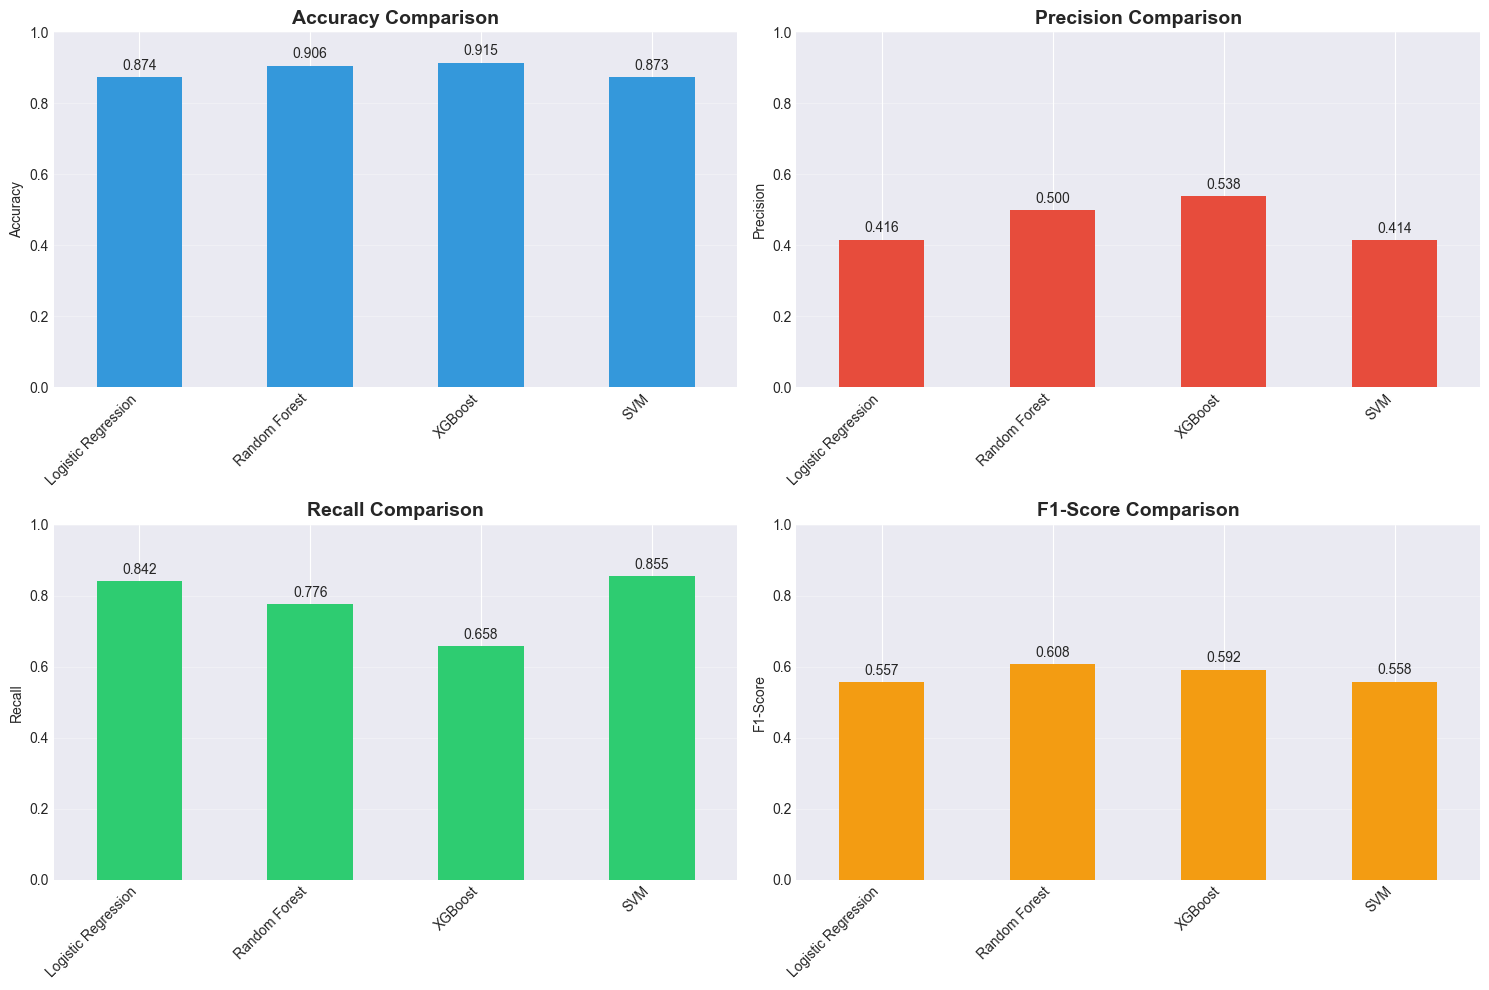

In [18]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, ax) in enumerate(zip(metrics_to_plot, axes.flat)):
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color=colors[idx])
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

plt.tight_layout()
plt.show()

In [19]:
print("\n" + "="*70)
print("🔧 HYPERPARAMETER TUNING - BEST MODEL")
print("="*70)

print(f"\n🎯 Tuning: {best_model_name}")
print("\n📝 Why Tune?")
print("   ✅ Default parameters may not be optimal")
print("   ✅ Can improve performance significantly")
print("   ✅ Find best trade-off between bias and variance")

# Based on best model, define parameter grid
# This example tunes XGBoost - adjust if another model is best

print("\n⏳ Starting hyperparameter tuning...")
print("   This may take several minutes...\n")

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("🔍 Parameter Grid:")
for param, values in param_grid.items():
    print(f"   - {param}: {values}")

# Initialize base model (adjust based on best model)
if 'XGBoost' in best_model_name:
    base_model = XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=RANDOM_STATE,
        eval_metric='logloss',
        use_label_encoder=False
    )
elif 'Random Forest' in best_model_name:
    base_model = RandomForestClassifier(
        random_state=RANDOM_STATE,
        n_jobs=-1,
        class_weight='balanced'
    )
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [15, 20, 25],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [2, 5, 10]
    }
else:
    base_model = lr_model  # Use logistic regression if it's best

print("\n🔧 Tuning Method: RandomizedSearchCV")
print("   - n_iter: 20 (try 20 combinations)")
print("   - cv: 3 (3-fold cross-validation)")
print("   - scoring: 'f1' (optimize F1-score)")

# RandomizedSearchCV (faster than GridSearchCV)
random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=2
)

# Fit
random_search.fit(X_train_resampled, y_train_resampled)

print("\n✅ Hyperparameter tuning complete!")
print(f"\n🎯 Best parameters found:")
for param, value in random_search.best_params_.items():
    print(f"   - {param}: {value}")
print(f"\n📊 Best cross-validation F1-score: {random_search.best_score_:.4f}")


🔧 HYPERPARAMETER TUNING - BEST MODEL

🎯 Tuning: Random Forest

📝 Why Tune?
   ✅ Default parameters may not be optimal
   ✅ Can improve performance significantly
   ✅ Find best trade-off between bias and variance

⏳ Starting hyperparameter tuning...
   This may take several minutes...

🔍 Parameter Grid:
   - n_estimators: [100, 200, 300]
   - max_depth: [4, 6, 8]
   - learning_rate: [0.01, 0.1, 0.2]
   - subsample: [0.8, 1.0]
   - colsample_bytree: [0.8, 1.0]

🔧 Tuning Method: RandomizedSearchCV
   - n_iter: 20 (try 20 combinations)
   - cv: 3 (3-fold cross-validation)
   - scoring: 'f1' (optimize F1-score)
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Hyperparameter tuning complete!

🎯 Best parameters found:
   - n_estimators: 200
   - min_samples_split: 5
   - min_samples_leaf: 2
   - max_depth: 20

📊 Best cross-validation F1-score: 0.9442


In [20]:
# Get the best model
best_tuned_model = random_search.best_estimator_

# Evaluate on validation set
y_val_pred_tuned = best_tuned_model.predict(X_val_scaled)
y_val_proba_tuned = best_tuned_model.predict_proba(X_val_scaled)[:, 1]

print("\n" + "="*70)
print(f"📊 TUNED {best_model_name.upper()} - VALIDATION PERFORMANCE")
print("="*70)

print(f"\nAccuracy:  {accuracy_score(y_val, y_val_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_tuned):.4f}")
print(f"Recall:    {recall_score(y_val, y_val_pred_tuned):.4f}")
print(f"F1-Score:  {f1_score(y_val, y_val_pred_tuned):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_val, y_val_proba_tuned):.4f}")
print(f"PR-AUC:    {average_precision_score(y_val, y_val_proba_tuned):.4f}")

print("\n📈 Improvement from Default to Tuned:")
original_f1 = comparison_df.loc[best_model_idx, 'F1-Score']
tuned_f1 = f1_score(y_val, y_val_pred_tuned)
improvement = ((tuned_f1 - original_f1) / original_f1) * 100

print(f"   Original F1-Score: {original_f1:.4f}")
print(f"   Tuned F1-Score:    {tuned_f1:.4f}")
print(f"   Improvement:       {improvement:+.2f}%")


📊 TUNED RANDOM FOREST - VALIDATION PERFORMANCE

Accuracy:  0.9137
Precision: 0.5294
Recall:    0.7105
F1-Score:  0.6067
ROC-AUC:   0.9311
PR-AUC:    0.6699

📈 Improvement from Default to Tuned:
   Original F1-Score: 0.6082
   Tuned F1-Score:    0.6067
   Improvement:       -0.25%


In [21]:
print("\n" + "="*70)
print("💾 SAVING MODELS")
print("="*70)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)
print("✅ Created '../models' directory")

# Save all models
models_to_save = {
    'logistic_regression': lr_trained,
    'random_forest': rf_trained,
    'xgboost': xgb_trained,
    'svm': svm_trained,
    f'{best_model_name.lower().replace(" ", "_")}_tuned': best_tuned_model
}

print("\n📦 Saving models...")
for name, model in models_to_save.items():
    filename = f'../models/{name}_model.joblib'
    joblib.dump(model, filename)
    print(f"   ✅ Saved: {filename}")

# Save scaler
joblib.dump(scaler, '../models/scaler.joblib')
print(f"   ✅ Saved: ../models/scaler.joblib")

# Save feature names
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, '../models/feature_names.joblib')
print(f"   ✅ Saved: ../models/feature_names.joblib")

# Save comparison results
comparison_df.to_csv('../models/model_comparison.csv', index=False)
print(f"   ✅ Saved: ../models/model_comparison.csv")

print("\n✅ All models and artifacts saved successfully!")


💾 SAVING MODELS
✅ Created '../models' directory

📦 Saving models...
   ✅ Saved: ../models/logistic_regression_model.joblib
   ✅ Saved: ../models/random_forest_model.joblib
   ✅ Saved: ../models/xgboost_model.joblib
   ✅ Saved: ../models/svm_model.joblib
   ✅ Saved: ../models/random_forest_tuned_model.joblib
   ✅ Saved: ../models/scaler.joblib
   ✅ Saved: ../models/feature_names.joblib
   ✅ Saved: ../models/model_comparison.csv

✅ All models and artifacts saved successfully!


In [22]:
print("\n" + "="*80)
print("🎉 MODELING NOTEBOOK COMPLETED!")
print("="*80)

print("\n✅ What We Accomplished:")
print("   1. ✅ Loaded processed data (5,410 providers, 24 features)")
print("   2. ✅ Handled class imbalance with SMOTE")
print("   3. ✅ Trained 4 different models:")
print("       - Logistic Regression (baseline)")
print("       - Random Forest (ensemble)")
print("       - XGBoost (gradient boosting)")
print("       - SVM (comparison)")
print("   4. ✅ Compared models using comprehensive metrics")
print(f"   5. ✅ Identified best model: {best_model_name}")
print("   6. ✅ Tuned hyperparameters for optimal performance")
print("   7. ✅ Saved all models for evaluation and deployment")

print(f"\n🏆 Best Model Performance:")
print(f"   Model: {best_model_name}")
print(f"   F1-Score: {tuned_f1:.4f}")
print(f"   Precision: {precision_score(y_val, y_val_pred_tuned):.4f}")
print(f"   Recall: {recall_score(y_val, y_val_pred_tuned):.4f}")
print(f"   ROC-AUC: {roc_auc_score(y_val, y_val_proba_tuned):.4f}")

print("\n📂 Saved Files (in ../models/):")
print("   - logistic_regression_model.joblib")
print("   - random_forest_model.joblib")
print("   - xgboost_model.joblib")
print("   - svm_model.joblib")
print(f"   - {best_model_name.lower().replace(' ', '_')}_tuned_model.joblib")
print("   - scaler.joblib")
print("   - feature_names.joblib")
print("   - model_comparison.csv")

print("\n📝 Next Steps (Notebook 03 - Evaluation):")
print("   1. Load the best tuned model")
print("   2. Evaluate on test set (final unseen data)")
print("   3. Generate detailed confusion matrix")
print("   4. Create ROC and Precision-Recall curves")
print("   5. Analyze feature importance")
print("   6. Conduct error analysis (false positives/negatives)")
print("   7. Create final visualizations and report")

print("\n" + "="*80)
print("✨ Ready for Notebook 03: Evaluation!")
print("="*80)


🎉 MODELING NOTEBOOK COMPLETED!

✅ What We Accomplished:
   1. ✅ Loaded processed data (5,410 providers, 24 features)
   2. ✅ Handled class imbalance with SMOTE
   3. ✅ Trained 4 different models:
       - Logistic Regression (baseline)
       - Random Forest (ensemble)
       - XGBoost (gradient boosting)
       - SVM (comparison)
   4. ✅ Compared models using comprehensive metrics
   5. ✅ Identified best model: Random Forest
   6. ✅ Tuned hyperparameters for optimal performance
   7. ✅ Saved all models for evaluation and deployment

🏆 Best Model Performance:
   Model: Random Forest
   F1-Score: 0.6067
   Precision: 0.5294
   Recall: 0.7105
   ROC-AUC: 0.9311

📂 Saved Files (in ../models/):
   - logistic_regression_model.joblib
   - random_forest_model.joblib
   - xgboost_model.joblib
   - svm_model.joblib
   - random_forest_tuned_model.joblib
   - scaler.joblib
   - feature_names.joblib
   - model_comparison.csv

📝 Next Steps (Notebook 03 - Evaluation):
   1. Load the best tuned mode